In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

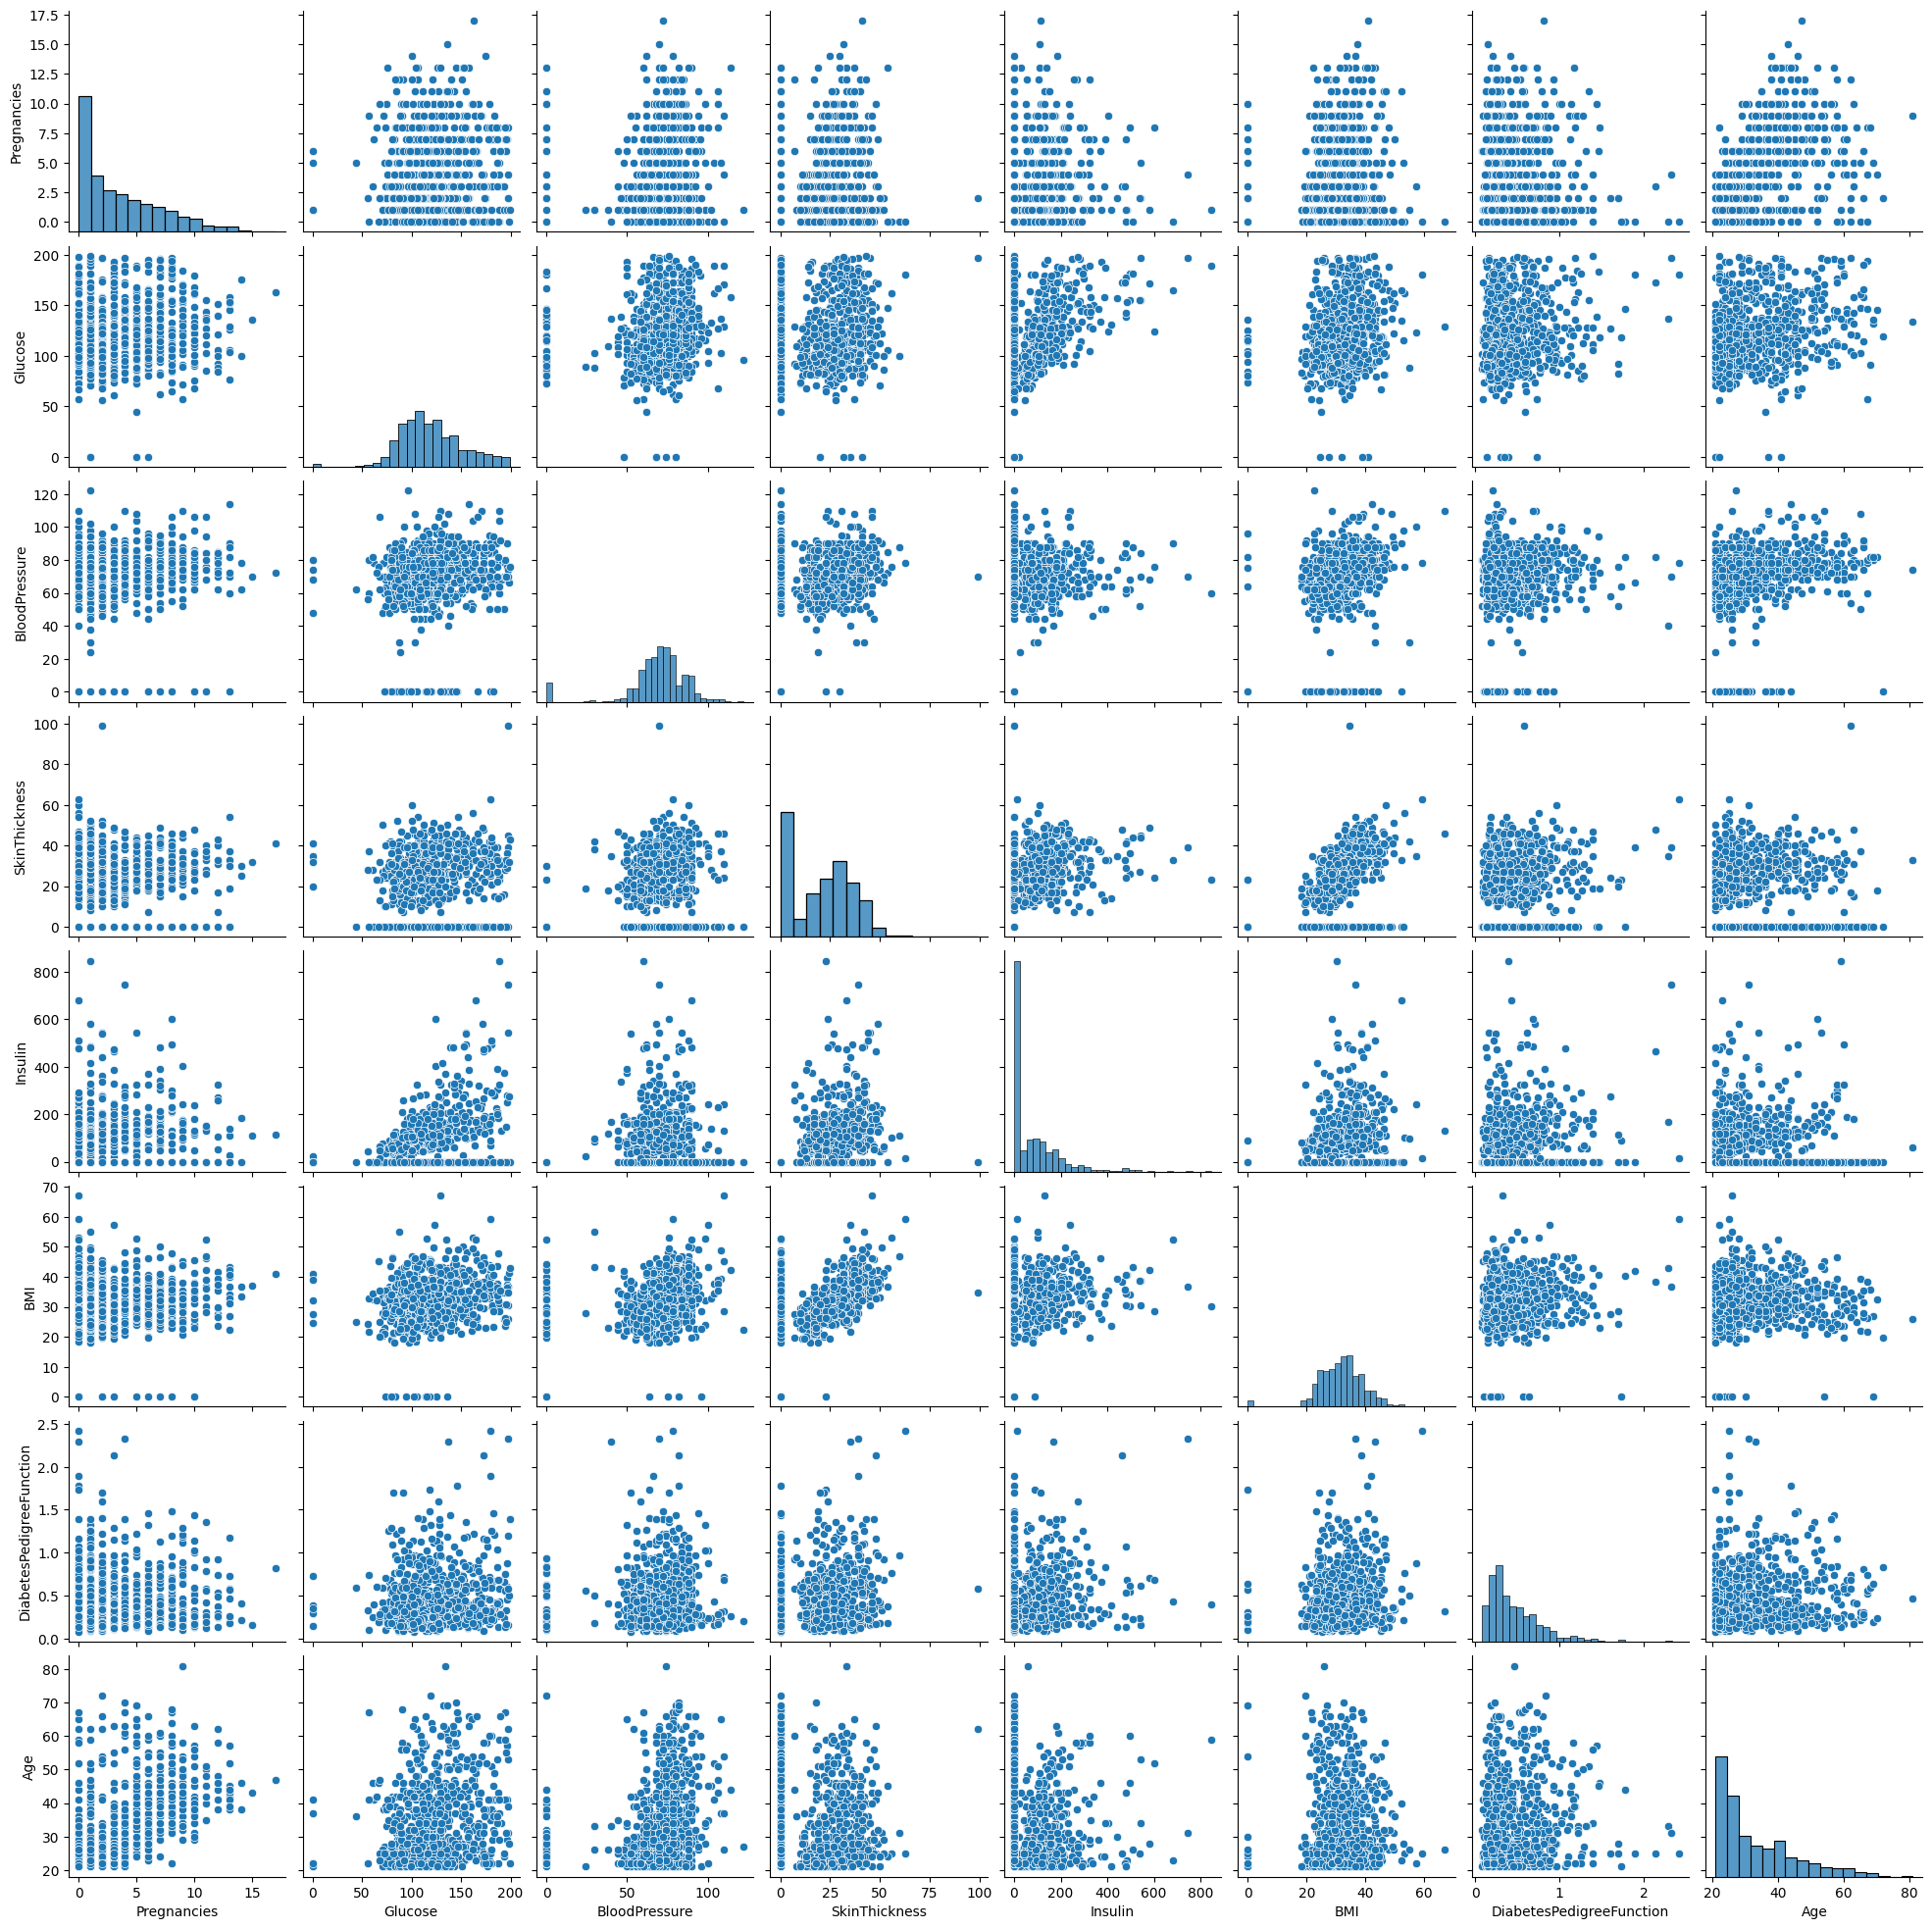

In [16]:
sns.pairplot(df.iloc[:,:-1])

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)

## Question 2

In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values

(<AxesSubplot:>,)

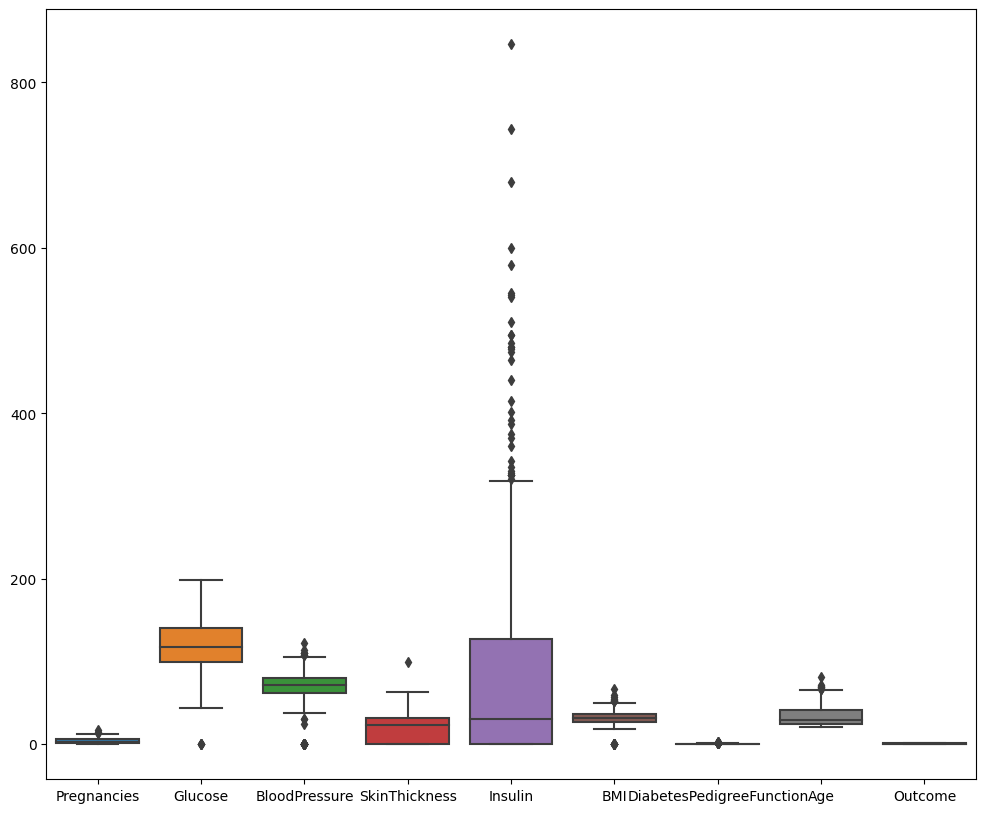

In [14]:
plt.figure(figsize=(12,10))
sns.boxplot(df),

## Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [54]:
x_train=scaler.fit_transform(xtrain)

In [55]:
x_test=scaler.transform(xtest)

<AxesSubplot:>

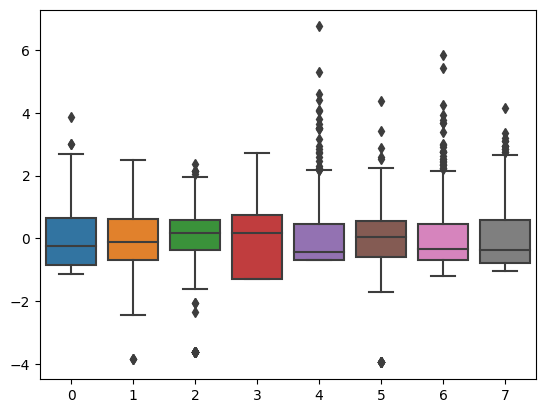

In [56]:
sns.boxplot(x_train)

## Question 3

In [57]:
x_train.shape,ytrain.shape

((614, 8), (614,))

In [58]:
x_test.shape,ytest.shape

((154, 8), (154,))

## Question 4

In [59]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [60]:
clf=DecisionTreeClassifier()
param={
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth':[i for i in range(2,8)],
    'min_samples_split':[1,2,3],
    'max_features': ["auto", "sqrt", "log2"],
}

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
model=GridSearchCV(clf,param_grid=param,scoring='accuracy',cv=5)

In [63]:
model.fit(x_train,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3]},
             scoring='accuracy')

In [64]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'min_samples_split': 2}

## Question 5

In [65]:
ypred=model.predict(x_test)

accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [66]:
from sklearn import metrics

In [67]:
accuracy=metrics.accuracy_score(ytest,ypred)
report=metrics.classification_report(ytest,ypred)
con_mat=metrics.confusion_matrix(ytest,ypred)

accuracy score : 0.7337662337662337
classification report :               precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

confusion matrix :


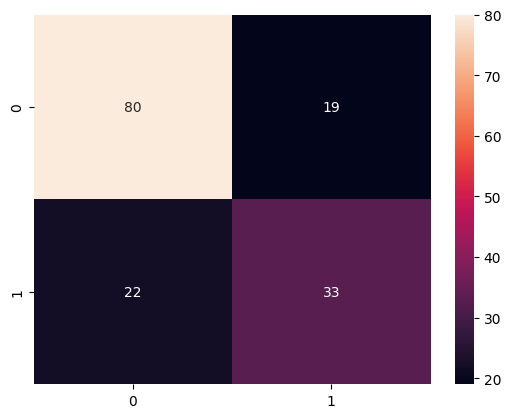

In [72]:
print(f"accuracy score : {accuracy}")
print(f"classification report : {report}")
print('confusion matrix :')
sns.heatmap(con_mat,annot=True)
plt.show()

## Question 6

In [73]:
from sklearn import tree

In [78]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'min_samples_split': 2}

In [87]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=2,max_features='log2',min_samples_split=2)

In [90]:
clf.fit(x_train,ytrain)

DecisionTreeClassifier(max_depth=2, max_features='log2')

[Text(0.5, 0.8333333333333334, 'X[5] <= -0.252\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.5, 'X[7] <= -0.483\ngini = 0.275\nsamples = 231\nvalue = [193, 38]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.079\nsamples = 122\nvalue = [117, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.422\nsamples = 109\nvalue = [76, 33]'),
 Text(0.75, 0.5, 'X[6] <= 0.799\ngini = 0.496\nsamples = 383\nvalue = [208, 175]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.481\nsamples = 311\nvalue = [186, 125]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.424\nsamples = 72\nvalue = [22, 50]')]

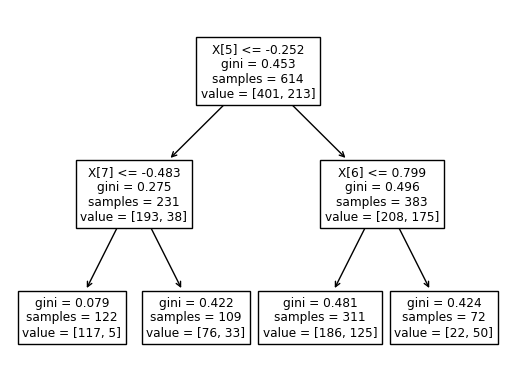

In [91]:
tree.plot_tree(clf)

In [92]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


x[5] that is BMI is the root node of the decision tree

and then DiabetesPedigreeFunction and Age are also two important feature help in predicting since they have more information gain in the level 1

## Question 7

model is ready for predicting

for example,

if test case is 
Pregnancies	8 ;
Glucose	188 ; 
BloodPressure  78 ;
SkinThickness	0;
Insulin	0 ;
BMI	47.9 ;
DiabetesPedigreeFunction   0.137 ;
Age  43 ;


In [97]:
values=[[8,188,78,0,0,47.9,0.137,43]]

In [99]:
scaled_valued=scaler.transform(values)
scaled_valued

array([[ 1.22612759,  2.14033507,  0.47393704, -1.30441236, -0.69719712,
         1.9827205 , -1.00689252,  0.85542472]])

In [102]:
ypred=model.predict(scaled_valued)
if ypred[0]==1:
    print('Diabetic')
else:
    print('Non Diabetic')

Diabetic
